In [1]:
import numpy as np
import pandas as pd

import pytraj as pt


%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt

import pickle
import os
import sys

from glob import glob

import free_energy_clustering as FEC

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [3]:
indir1 = '../1-Trajectories/1-NoEq_without_IPA'
# indir2 = '../1-Trajectories/4-Adaptive_sampling_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
# traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list=traj_list1# +traj_list2
traj_list

['../1-Trajectories/1-NoEq_without_IPA/closed_dry_01.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_02.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_03.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_04.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_05.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_06.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_07.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_08.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_09.nc',
 '../1-Trajectories/1-NoEq_without_IPA/closed_dry_10.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_01.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_02.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_03.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_04.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_05.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_06.nc',
 '../1-Trajectories/1-NoEq_without_IPA/open_dry_07.nc',
 '../1-Trajectories/1-NoEq_w

In [5]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

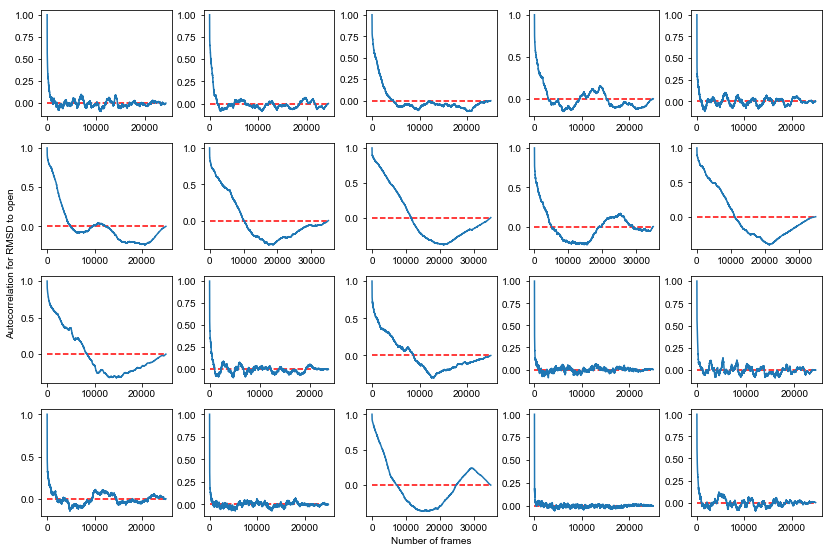

In [27]:
fig, axes = plt.subplots(4, 5, figsize=(12,8), sharex=False, sharey=False)


for i, ax in enumerate(axes.flat):
    c=pt.acorr(results_open[i], option='nocovar')
    ax.plot(c)
    
#     ax.set_xlim(0,100000)
#     ax.set_xticks(np.arange(0, 5, 1))    
#     ax.set_ylim(0,10000)
#     ax.set_yticks(np.arange(0, 5, 1))  
    ax.hlines(0, 0, len(c),colors='r', linestyles='--')


# To have common x and y labels   
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel('Number of frames')
plt.ylabel('Autocorrelation for RMSD to open')
plt.tight_layout()


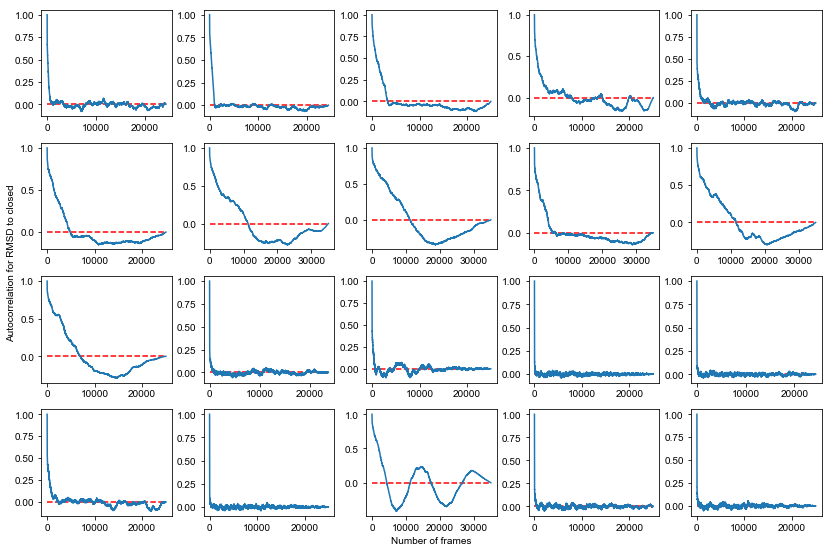

In [26]:
fig, axes = plt.subplots(4, 5, figsize=(12,8), sharex=False, sharey=False)


for i, ax in enumerate(axes.flat):
    c=pt.acorr(results_closed[i], option='nocovar')
    ax.plot(c)
    
#     ax.set_xlim(0,100000)
#     ax.set_xticks(np.arange(0, 5, 1))    
#     ax.set_ylim(0,10000)
#     ax.set_yticks(np.arange(0, 5, 1))  
    ax.hlines(0, 0, len(c),colors='r', linestyles='--')


# To have common x and y labels   
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel('Number of frames')
plt.ylabel('Autocorrelation for RMSD to closed')
plt.tight_layout()

In [7]:
# The following four lines create lists we will use to store values we calculate as we work through this notebook.
rmsd_means = [None] * 4
rmsd_c95lows = [None] * 4
rmsd_c95highs = [None] * 4
methods = [None] * 4

rmsd_means[0] = rmsd_open.mean()
stderr = rmsd_open.std()/np.sqrt(len(rmsd_open))
rmsd_c95lows[0] = rmsd_means[0] - 1.96 * stderr # The lower bound of the 95% confidence interval
rmsd_c95highs[0] = rmsd_means[0] + 1.96 * stderr # The upper bound of the 95% confidence interval

text = "{}:\nMean RMSD to open: {:3.3f} nm, 95% confidence interval {:3.3f} nm to {:3.3f} nm\n"
methods[0] = "Naive approach"
for i in range(1):
    print(text.format(methods[i], rmsd_means[i], rmsd_c95lows[i], rmsd_c95highs[i]))

Naive approach:
Mean RMSD to open: 2.577 nm, 95% confidence interval 2.576 nm to 2.578 nm



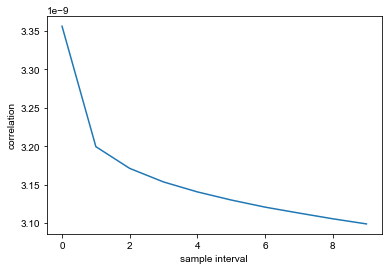

In [8]:
rmsd2 = rmsd_open - rmsd_open.mean()
c = np.correlate(rmsd2, rmsd2, 'full')
c = c[int(c.size/2):]
c /= (c.var() * np.arange(rmsd2.size, 0, -1))


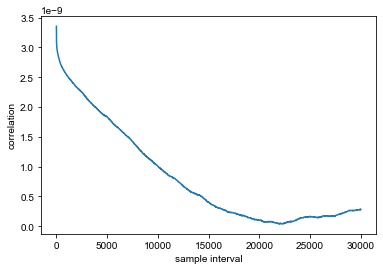

In [16]:
plt.xlabel('sample interval')
plt.ylabel('correlation')
plt.plot(c[:30000])